In [49]:
# Add relevant Jupyter notebook extensions
%reload_ext autoreload
%autoreload 2

from uuv_mission.dynamic import Mission, Submarine, ClosedLoop, calculate_mae
import uuv_mission.terrain
from uuv_mission.control import PDController

In [50]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24', '/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/notebooks', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/myvenv/lib/python3.9/site-packages']


In [51]:
"""
Testing part 3: Mission data extraction using pandas
"""

if __name__ == "__main__":
    # Use the absolute path to the mission.csv file
    mission_file = "/Users/paras/Library/CloudStorage/OneDrive-Nexus365/Oxford/Y3/B1/Scientific Coding/Scientific Coding Practical/B1 Coding Practical MT24/data/mission.csv"
    
    # Call the from_csv method to load the mission data
    mission = Mission.from_csv(mission_file)
    
    # Print out the loaded data to verify
    #print("Reference Depths:", mission.reference)
   #print("Cave Heights:", mission.cave_height)
    #print("Cave Depths:", mission.cave_depth)

number of rows  100


T is  100


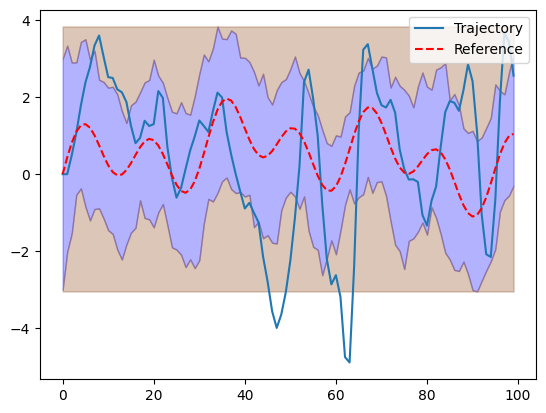

In [52]:
# Step 1: Create Submarine and PDController objects
submarine = Submarine()
controller = PDController(kp=0.5, kd=0.1)

# Step 2: Load the mission data from a CSV file or generate a random mission
mission_file = "/path/to/your/mission.csv"  # Make sure the path is correct
mission = Mission.from_csv(mission_file)

# Step 3: Create the ClosedLoop system
closed_loop = ClosedLoop(plant=submarine, controller=controller)

# Step 4: Simulate the mission with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)

# Step 5: Calculate the Mean Absolute Error (MAE)
actual_depth = trajectory.position[:, 1]  # y-positions of the submarine (actual depths)
reference_depth = mission.reference  # Reference depths from the mission

# Calculate the MAE
mae = calculate_mae(reference_depth, actual_depth)
print("Mean Absolute Error (MAE):", mae)

# Step 6: Plot the resulting trajectory
trajectory.plot_completed_mission(mission)

print()

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [53]:
# Import relevant modules

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/file'